# Marked Point Pattern

In addition to the [unmarked point pattern](pointpattern.ipynb), non-binary attributes might be associated with each point, leading to the so-called marked point pattern. The charactertistics of a marked point pattern are:

* Location pattern of the events are of interest
* Stochastic attribute attached to the events is of interest

Unmarked point pattern can be modified to be a marked point pattern using the method **add_marks** while the method **explode** could decompose a marked point pattern into a sequence of unmarked point patterns. Both methods belong to the class **PointPattern**.

In [1]:
from pointpats.process import PoissonPointProcess, PoissonClusterPointProcess
from pointpats.window import Window, poly_from_bbox
from pointpats.pointpattern import PointPattern
import libpysal as ps
from libpysal.cg import shapely_ext
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# open the virginia polygon shapefile
va = ps.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]

In [3]:
# Create the exterior polygons for VA from the union of the county shapes
state = shapely_ext.cascaded_union(polys)
# create window from virginia state boundary
window = Window(state.parts)

In [4]:
window.bbox

[-83.67526245117188, 36.541481018066406, -75.24258422851562, 39.45690155029297]

In [5]:
window.centroid

(-78.85183583334933, 37.51851209850039)

In [6]:
samples = PoissonPointProcess(window, 200, 1, conditioning=False, asPP=False)

In [7]:
csr = PointPattern(samples.realizations[0])

In [8]:
cx, cy = window.centroid

In [9]:
cx

-78.85183583334933

In [10]:
cy

37.51851209850039

In [11]:
west = csr.points.x < cx
south = csr.points.y < cy
east = 1 - west
north = 1 - south

#### Create an attribute named quad which has a value for each event.

In [12]:
quad = 1 * east * north +  2 * west * north + 3 * west * south + 4 * east * south

In [13]:
type(quad)

pandas.core.series.Series

In [14]:
quad

0      3
1      1
2      1
3      4
4      3
5      1
6      3
7      3
8      1
9      3
10     3
11     1
12     3
13     4
14     1
15     1
16     3
17     1
18     1
19     4
20     1
21     4
22     1
23     1
24     2
25     1
26     1
27     1
28     4
29     4
      ..
170    2
171    3
172    1
173    2
174    4
175    3
176    3
177    3
178    1
179    3
180    1
181    3
182    2
183    3
184    4
185    3
186    1
187    2
188    3
189    1
190    1
191    2
192    1
193    3
194    3
195    4
196    1
197    1
198    2
199    4
dtype: int64

#### Attach the attribute quad to the point pattern 

In [15]:
csr.add_marks([quad], mark_names=['quad'])

In [16]:
csr.df

,x,y,quad
0,-81.444010,36.979415,3
1,-77.637983,38.331105,1
2,-78.529407,38.131739,1
3,-78.721097,37.136996,4
4,-79.882041,37.219793,3
5,-76.635712,37.836506,1
6,-80.096085,36.961177,3
7,-81.934481,37.229025,3
8,-77.324925,37.835326,1
9,-80.877329,37.068136,3


#### Explode a marked point pattern into a sequence of individual point patterns. Since the mark quad has 4 unique values, the sequence will be of length 4.

In [17]:
csr_q = csr.explode('quad')

In [18]:
len(csr_q)

4

In [19]:
csr

In [20]:
csr.summary()

Point Pattern
200 points
Bounding rectangle [(-83.12778472,36.5566656248), (-75.5495808162,39.3167230308)]
Area of window: 20.9162778088
Intensity estimate for window: 9.56193075211
           x          y  quad
0 -81.444010  36.979415     3
1 -77.637983  38.331105     1
2 -78.529407  38.131739     1
3 -78.721097  37.136996     4
4 -79.882041  37.219793     3


#### Plot the 4 individual sequences

In [21]:
plt.xlim?

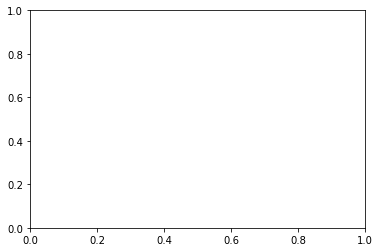

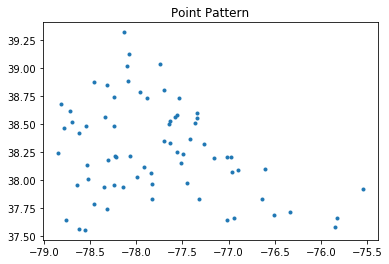

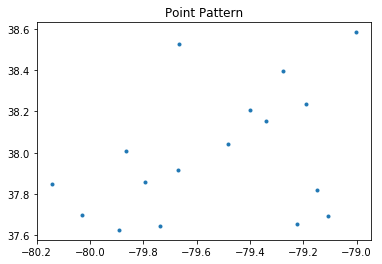

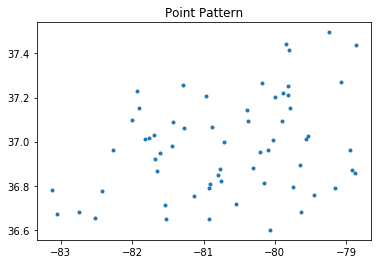

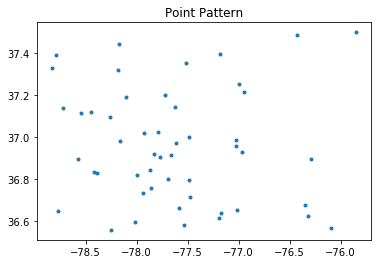

In [22]:
plt.xlim()
for ppn in csr_q:
    ppn.plot()

#### Plot the 4 unmarked point patterns using the same axes for a convenient comparison of locations

In [23]:
x0, y0, x1, y1 = csr.mbb
ylim = (y0, y1)
xlim = (x0, x1)

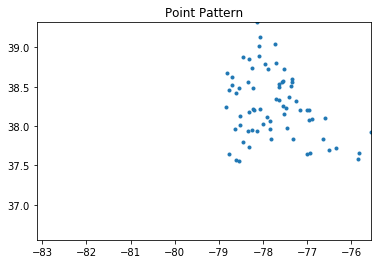

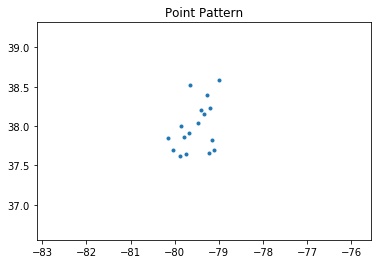

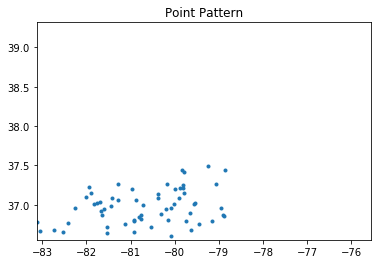

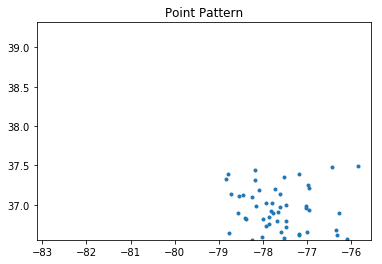

In [24]:
for ppn in csr_q:
    ppn.plot()
    plt.xlim(xlim)
    plt.ylim(ylim)